In [1]:
from modules.data import data_loader, data_splitter, data_reader
from modules.models import arima, lag_llama
from modules.evaluation.evaluate import evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import islice

In [3]:
prediction_length = 10

In [4]:
data = data_loader.get_simle_data()
train, test = data_splitter.split_data(data, prediction_length)

[*********************100%%**********************]  1 of 1 completed


In [5]:
arima_model = arima.get_autoarima(train)

In [6]:
autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)

In [7]:
lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)

In [8]:
lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

In [9]:
data["arima_forecast"] = [None] * len(train) + autoarima_predictions
data["lag_llama_forecast"] = [None] * len(train) + lag_llama_predictions

<AxesSubplot: >

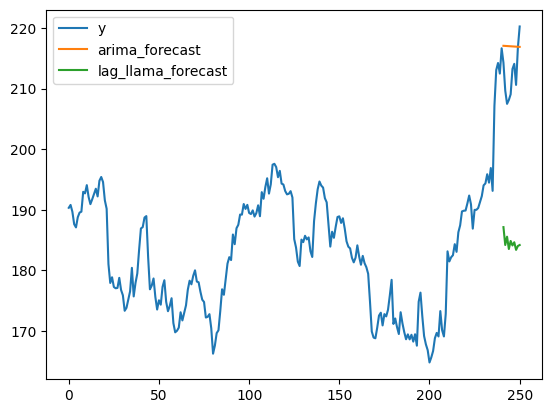

In [10]:
data.drop("ds", axis = 1).plot()

In [11]:
evaluate(list(test["y"]), autoarima_predictions = autoarima_predictions, lag_llama_predictions = lag_llama_predictions)

Evaluation for autoarima_predictions:
Mean Squared Error (MSE): 36.850044209134225
Mean Absolute Error (MAE): 5.297077566424477
R-squared (R^2): -1.4252407161701486
Root Mean Squared Error (RMSE): 6.070423725666457
------------------------------
Evaluation for lag_llama_predictions:
Mean Squared Error (MSE): 789.6598705499898
Mean Absolute Error (MAE): 27.812947986547556
R-squared (R^2): -50.970501286638175
Root Mean Squared Error (RMSE): 28.10088736232345
------------------------------


In [14]:
all_stocks = data_reader.read_data("stock")[0]

['all_sp500_returns_1years_daily', 'all_sp500_stocks_1years_daily', 'exp.ipynb']
--------
['all_sp500_stocks_1years_daily']
--------


In [15]:
all_stocks.iloc[:, 203]

0      74.122696
1      73.163040
2      71.416496
3      72.635246
4      73.047897
         ...    
246    69.309998
247    68.830002
248    68.610001
249    68.639999
250    68.400002
Name: GILD, Length: 251, dtype: float64

In [16]:
first_col = True
i = 0
r2_arima = []
r2_llama = []
for column in list(all_stocks.columns):
    if first_col:
        first_col = False
        continue
    data = all_stocks[["ds", column]]
    data.columns = ["ds", "y"]
    train, test = data_splitter.split_data(data, prediction_length)
    
    arima_model = arima.get_autoarima(train)
    autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)
    lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)
    lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

    arima_r2 = r2_score(list(test["y"]), autoarima_predictions)
    llama_r2 = r2_score(list(test["y"]), lag_llama_predictions)

    r2_arima.append(arima_r2)
    r2_llama.append(llama_r2)
    print(column + f" done___{i}")
    print("--------------")
    i +=1


    

A done___0
--------------
AAL done___1
--------------
AAPL done___2
--------------
ABBV done___3
--------------
ABNB done___4
--------------
ABT done___5
--------------
ACGL done___6
--------------
ACN done___7
--------------
ADBE done___8
--------------
ADI done___9
--------------
ADM done___10
--------------
ADP done___11
--------------
ADSK done___12
--------------
AEE done___13
--------------
AEP done___14
--------------
AES done___15
--------------
AFL done___16
--------------
AIG done___17
--------------
AIZ done___18
--------------
AJG done___19
--------------
AKAM done___20
--------------
ALB done___21
--------------
ALGN done___22
--------------
ALL done___23
--------------
ALLE done___24
--------------
AMAT done___25
--------------
